In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [6]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
api = wandb.Api()

/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)
/home/sholto/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 152 from PyObject
  return f(*args, **kwds)


In [7]:
params = {'legend.fontsize': 25,
          'legend.handlelength': 2}
plt.rcParams.update(params)

In [8]:
runids = { 'B0_000003':'37t5e8ln', 'B0_00001':'3pmlbx39', 'B0_00003':'3v50zkj7', 'B0_00005':'qqi8ao1x', 'B0_0003':'2sm51tsu'}


In [11]:
def generate_run_data(runids):
    rundata = {}
    runcolors = {}
    runcolors2 = {}
    colors =list(sns.color_palette("husl", len(runids)))
    #colors = list(reversed(colors))
    colors2 =list(sns.color_palette("rocket", len(runids)))
    colors2 = list(reversed(colors2))

    for i, (name, ID) in enumerate(runids.items()):
        run = api.run(f"sholto/learning-from-play_v2/{ID}")
        # save the metrics for the run to a csv file
        metrics_dataframe = run.history()
        metrics_dataframe.to_csv(f"runs/{name}.csv")
        rundata[name] = pd.read_csv(f"runs/{name}.csv")
        runcolors[name] = colors[i]
        runcolors2[name] = colors2[i]
    return rundata, runcolors, runcolors2, colors, colors2

rundata, runcolors, runcolors2, colors, colors2 = generate_run_data(runids)

Retry attempt failed:
Traceback (most recent call last):
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
OSError: [Errno 101] Network is unreachable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 343, in _make_request
    self._validate_conn(conn)
  File "/home/sholto/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py"

CommError: HTTPSConnectionPool(host='api.wandb.ai', port=443): Max retries exceeded with url: /graphql (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f63591a9eb8>: Failed to establish a new connection: [Errno 101] Network is unreachable'))

Text(0.5, 1.0, 'MAE action reconstruction loss with plans and encodings. \n  Beta sweep of  3e-6, 1e-5, 3e-5, 5e-5, 3e-4 \n represented with intensity')

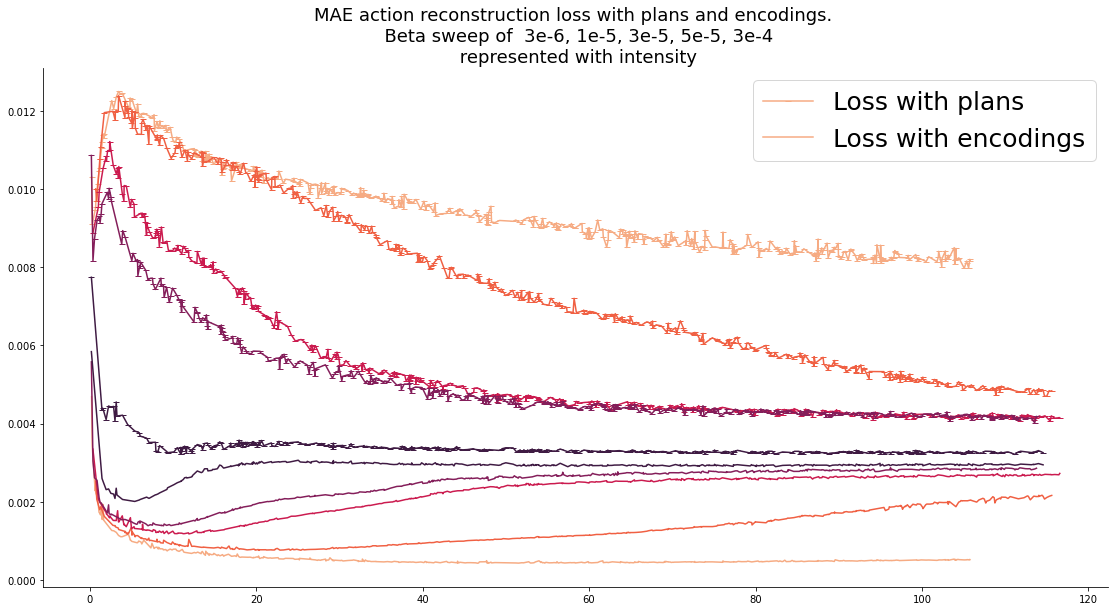

In [6]:
# %matplotlib inline
fig = plt.figure(figsize=(42, 21))

ax = fig.add_subplot(2,2, 1)
#ax2 = fig.add_subplot(2,2, 2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# x1,x2,y1,y2,h,w = 47,50,0.0033, 0.0094,0.001, 1
# plt.plot([x1, x1+w, x1+w, x1], [y1, y1, y2,y2], lw=1.5)

# x1,x2,y1,y2,h,w = 47,50,0.00043, 0.00295,0.001, 1
# plt.plot([x1, x1+w, x1+w, x1], [y1, y1, y2,y2], lw=1.5, c=colors2[2])

for name, df in rundata.items():
    time = df['_runtime']/60/60 # Hours!
    step = df['_step']
    x = time
    
    ax.plot(x,df['valid_act_with_plan_loss'], c=runcolors2[name], marker = '_' )
    ax.plot(x,df['valid_act_with_enc_loss'], c=runcolors2[name])
    

plt.legend(['Loss with plans', 'Loss with encodings'])
plt.title('MAE action reconstruction loss with plans and encodings. \n  Beta sweep of  3e-6, 1e-5, 3e-5, 5e-5, 3e-4 \n represented with intensity', fontsize=18)

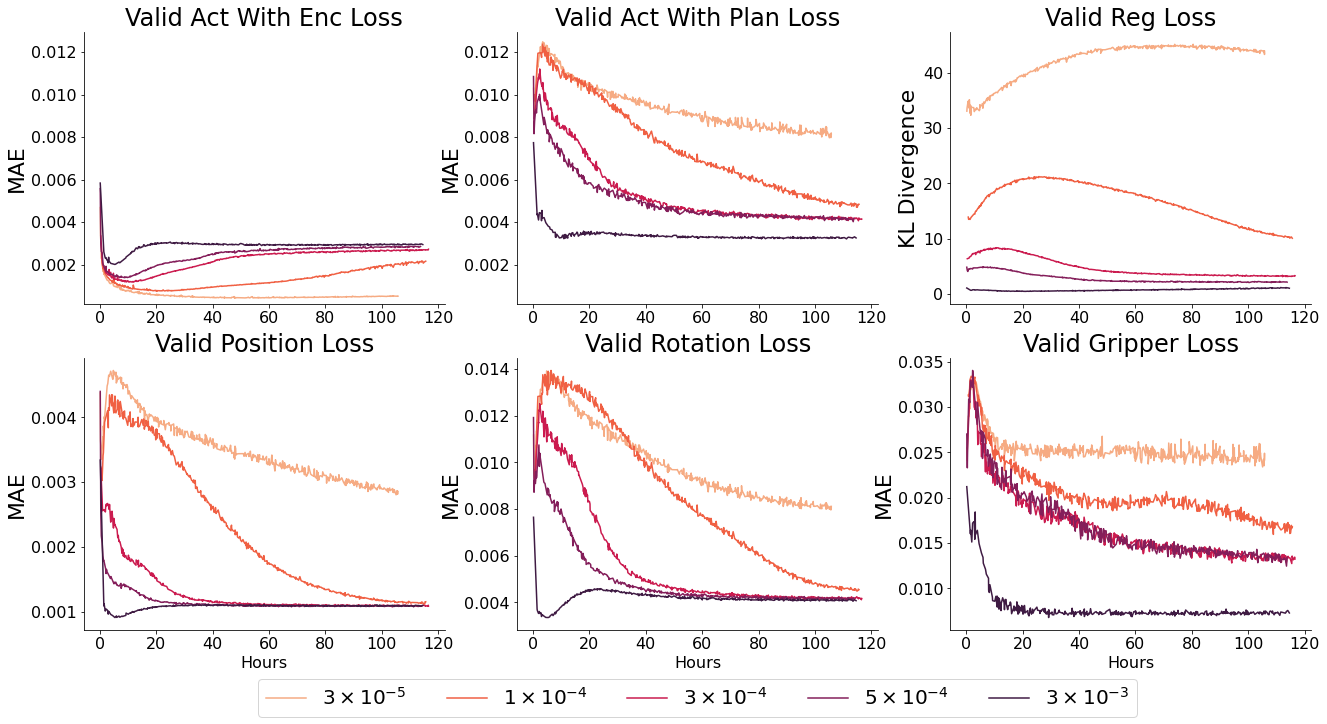

In [7]:
#%matplotlib qt

def comparison_plot(rundata, runcolors, legend=None, anchor = (0,0)):
    params = {'legend.fontsize': 20}
    plt.rcParams.update(params)

    fig = plt.figure(figsize=(22, 11))

    axs = [fig.add_subplot(2,3, i) for i in range(1,7)]

    def plot_chart(metric, ax):
        for name, df in rundata.items():
            time = df['_runtime']/60/60 # Hours!
            step = df['_step']
            x = time
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.set_ylabel('MAE', size=22)
            ax.plot(x,df[metric], c=runcolors[name])
            ax.set_title(metric.replace('_'," ").title(), size=24)
            ax.tick_params(axis='both', which='major', labelsize=16)
            ax.tick_params(axis='both', which='minor', labelsize=8)

    for i, metric in enumerate(['valid_act_with_enc_loss', 'valid_act_with_plan_loss', 'valid_reg_loss', 'valid_position_loss', 'valid_rotation_loss', 'valid_gripper_loss']):
        plot_chart(metric, axs[i])
    ymin, _ = axs[0].get_ylim()
    _, ymax = axs[1].get_ylim()
    
    axs[0].set_ylim(bottom = ymin, top = ymax)
    axs[1].set_ylim(bottom = ymin, top = ymax)
    if legend is None:
        legend = rundata.keys()
    plt.legend(legend, ncol=i+1, loc='center', bbox_to_anchor=anchor)

    for i in range(3,6):
        axs[i].set_xlabel('Hours', size = 16)
    axs[2].set_ylabel('KL Divergence')
    return axs
    
axs = comparison_plot(rundata, runcolors2, legend= [r'$3 \times 10^{-5}$',r'$1 \times 10^{-4}$',r'$3 \times 10^{-4}$',r'$5 \times 10^{-4}$',r'$3 \times 10^{-3}$'], anchor = (-0.7, -0.25))

In [8]:

runids = {'PB0_001':'2eym927d','PB0_005':'103o5nsz','PB0_01':'3bdz2c32','PB0_02':'kqzwgs24','PB0_05':'1jqazgap'}
rundata, runcolors, runcolors2, colors, colors2 = generate_run_data(runids)


Text(0, 0.5, '$-log(\\pi(a|s_t,s_g,z_p))$')

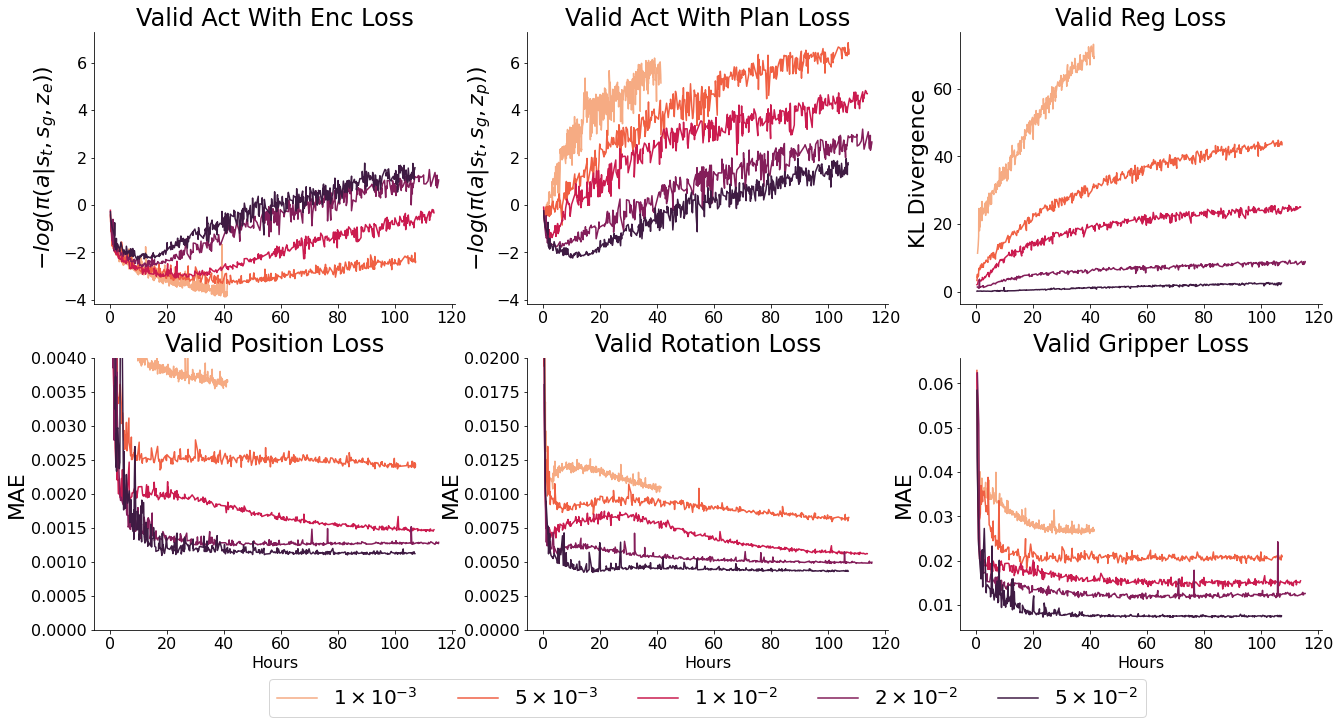

In [9]:

axs= comparison_plot(rundata, runcolors2, legend= [r'$1 \times 10^{-3}$',r'$5 \times 10^{-3}$',r'$1 \times 10^{-2}$',r'$2 \times 10^{-2}$',r'$5 \times 10^{-2}$'], anchor = (-0.7, -0.25))
axs[3].set_ylim(bottom = 0, top = 0.004)
axs[4].set_ylim(bottom = 0, top = 0.02)
axs[0].set_ylabel(r'$-log(\pi(a|s_t,s_g,z_e))$', size=22)
axs[1].set_ylabel(r'$-log(\pi(a|s_t,s_g,z_p))$', size=22)

Text(0, 0.5, 'Reconstruction loss')

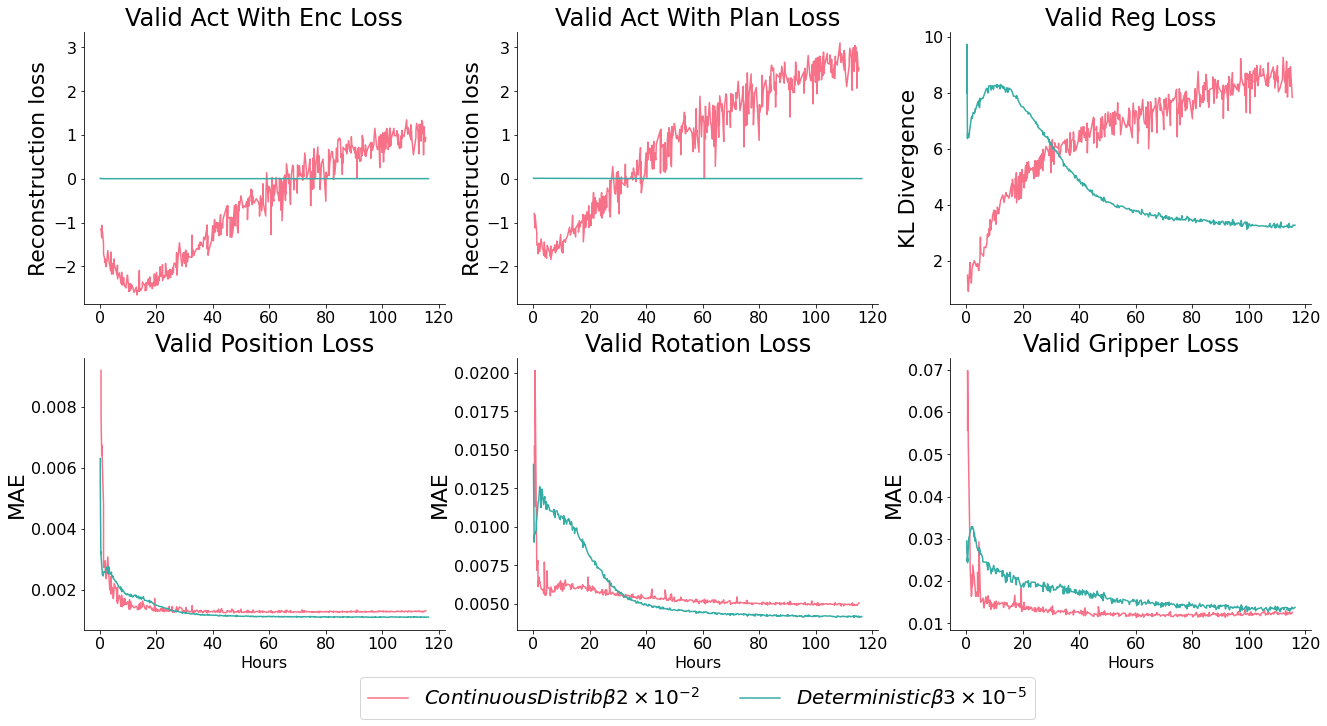

In [10]:
runids = {'PB0_02':'kqzwgs24', 'B0_00003':'3v50zkj7'}
rundata, runcolors, runcolors2, colors, colors2 = generate_run_data(runids)
axs= comparison_plot(rundata, runcolors, legend= [r'$Continuous Distrib \beta 2 \times 10^{-2}$',r'$Deterministic \beta 3 \times 10^{-5}$'], anchor = (-0.7, -0.25))
axs[0].set_ylabel('Reconstruction loss', size=22)
axs[1].set_ylabel('Reconstruction loss', size=22)

Text(0, 0.5, '$-log(\\pi(a|s_t,s_g,z_p))$')

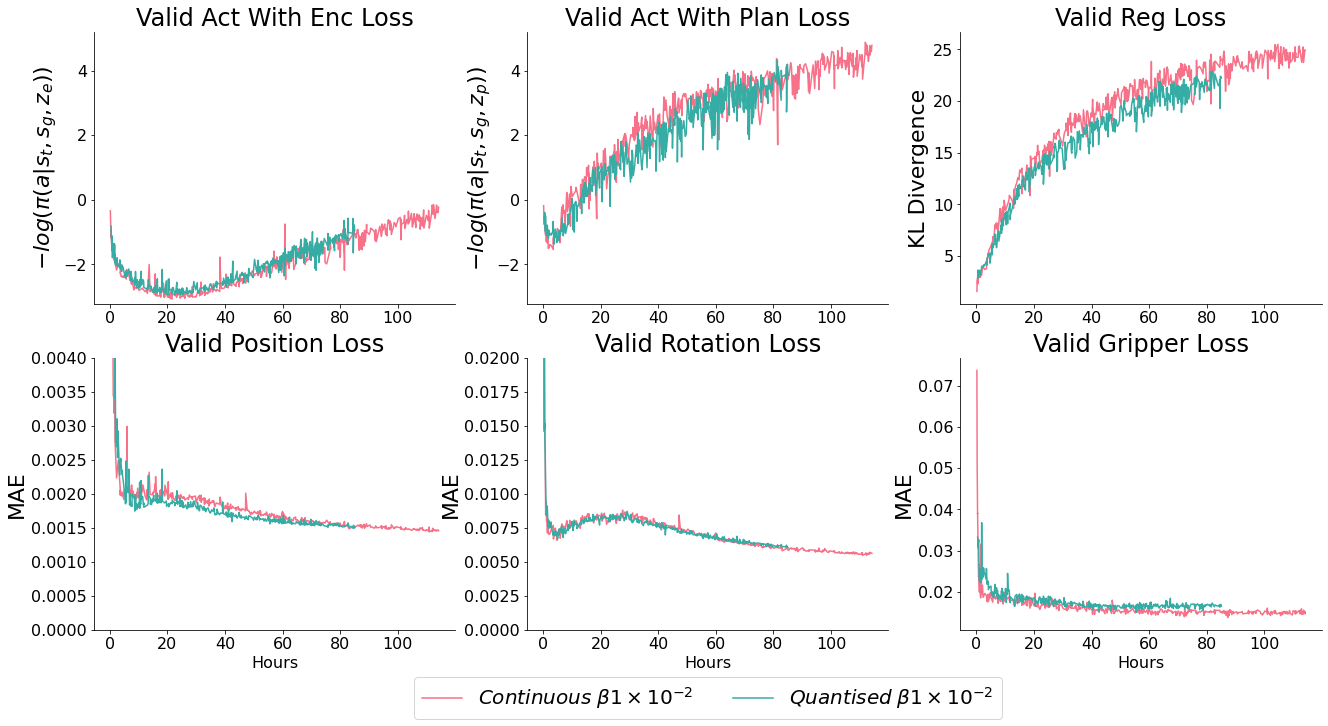

In [11]:


runids = {'PB0_01':'3bdz2c32','Quantised B0_01':'3g7hee3i'}
rundata, runcolors, runcolors2, colors, colors2 = generate_run_data(runids)
axs= comparison_plot(rundata, runcolors, legend= [r'$Continuous \; \beta 1 \times 10^{-2}$',r'$Quantised \; \beta 1 \times 10^{-2}$'], anchor = (-0.7, -0.25))
axs[3].set_ylim(bottom = 0, top = 0.004)
axs[4].set_ylim(bottom = 0, top = 0.02)
axs[0].set_ylabel(r'$-log(\pi(a|s_t,s_g,z_e))$', size=22)
axs[1].set_ylabel(r'$-log(\pi(a|s_t,s_g,z_p))$', size=22)

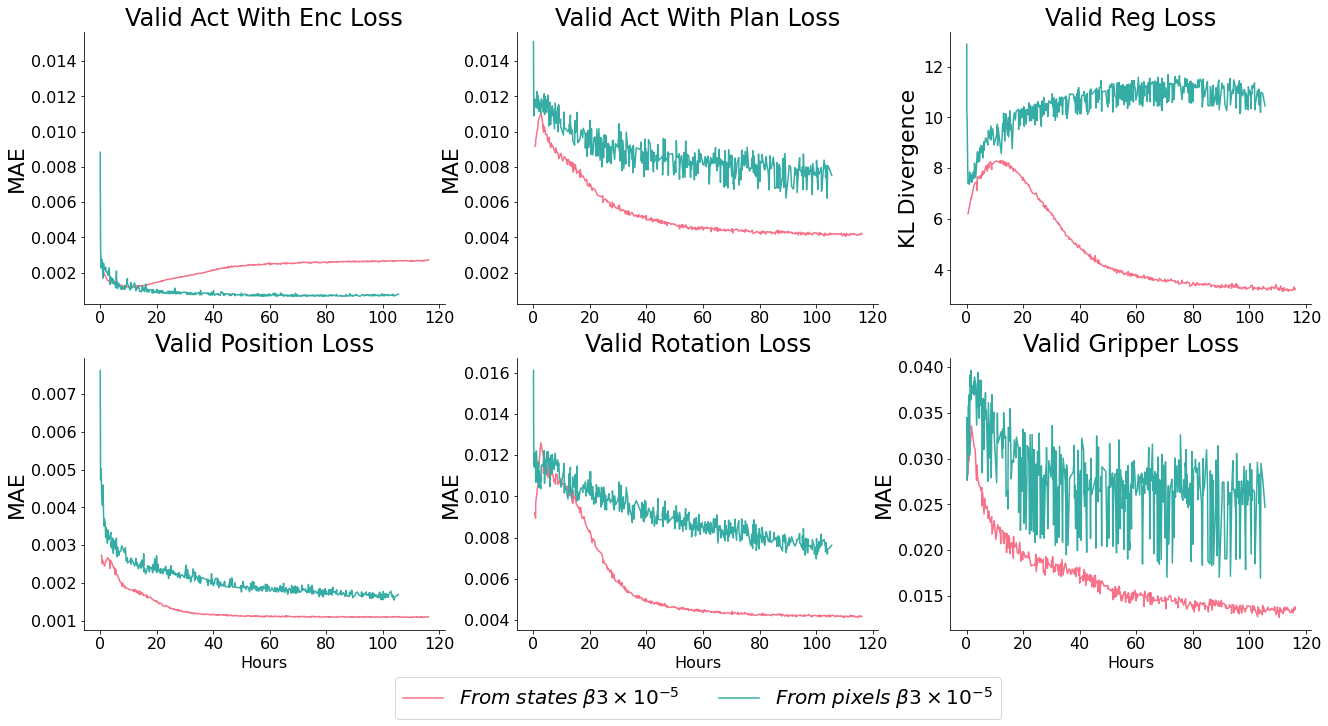

In [13]:
runids = {'B0_00003':'3v50zkj7', 'IMB0_00003':'39bf9sl8'}
rundata, runcolors, runcolors2, colors, colors2 = generate_run_data(runids)
axs= comparison_plot(rundata, runcolors, legend= [r'$From \; states \; \beta 3 \times 10^{-5}$',r'$From \; pixels \; \beta 3 \times 10^{-5}$'], anchor = (-0.7, -0.25))

In [71]:
def plot(ax, x, y,i, loss='MAE'):
    ax.clear()
    ax.plot(x, df[y][:i], c=runcolors2['B0_00001'])
    ax.set_title(y.replace('_'," ").title())
    ax.set_ylabel(loss)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

<IPython.core.display.Javascript object>


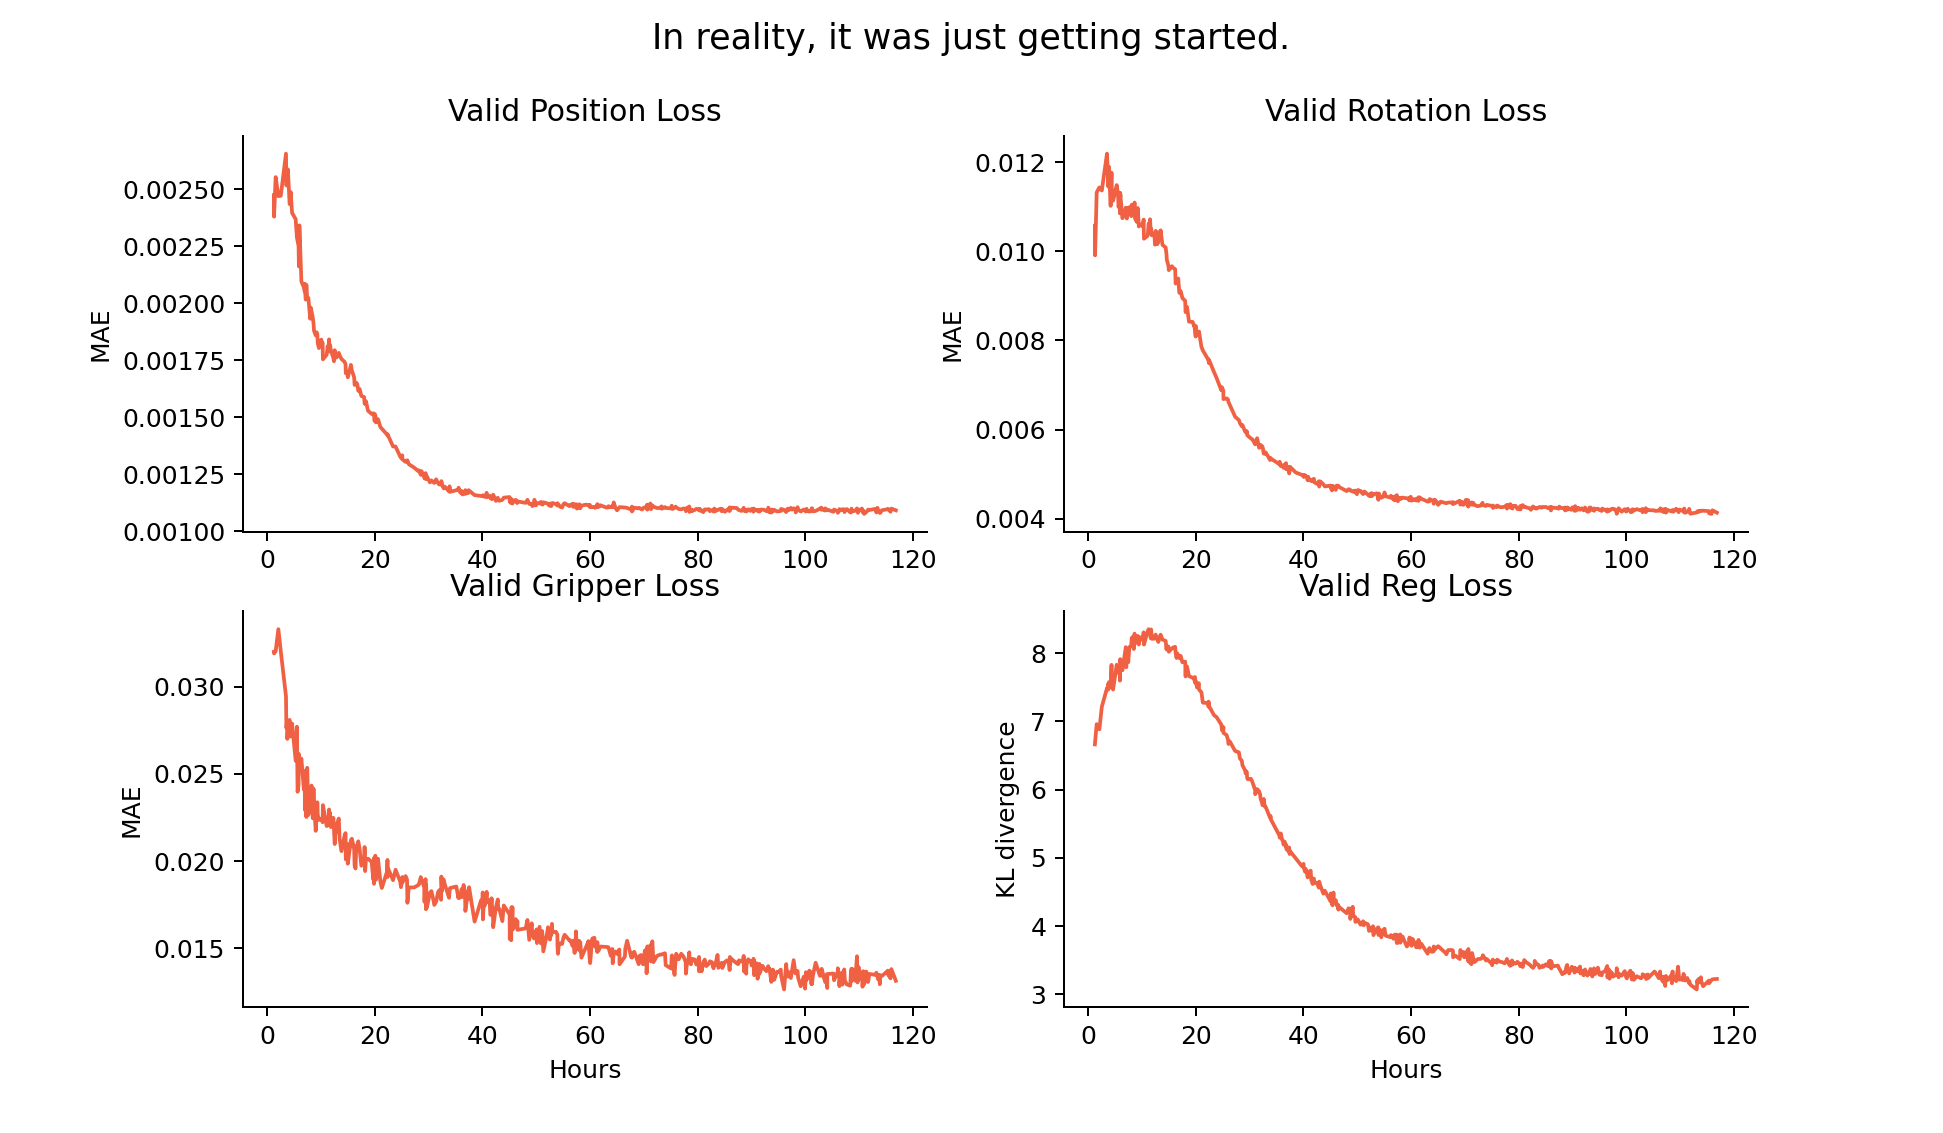

In [77]:
#importing libraries
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

df = rundata['B0_00003']

fig = plt.figure(figsize=(12, 7),dpi=200)
#creating a subplot 
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

t = list(np.linspace(1,20, 5))+list(np.linspace(30,50, 50))+list(np.linspace(50,500, 20))
def animate(i):
    i = int(t[i])
    x= time = df['_runtime'][:i]/60/60 # Hours!
    plot(ax1, x, 'valid_position_loss',i)
    plot(ax2, x, 'valid_rotation_loss',i)
    plot(ax3, x, 'valid_gripper_loss',i)
    plot(ax4, x, 'valid_reg_loss',i, loss = 'KL divergence')
    ax3.set_xlabel('Hours')
    ax4.set_xlabel('Hours')

    if np.max(x) > 8 and np.max(x) < 12:
        fig.suptitle('This is typically where Colab times out on an overnight run, somewhat promising, \n but we thought it was levelling off...', fontsize=14)
    elif np.max(x) > 12:
        fig.suptitle('In reality, it was just getting started.', fontsize=14)
    else:
        fig.suptitle(' ', fontsize=16)
    #fig.tight_layout() 

ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200)
  

In [78]:
writergif = animation.PillowWriter(fps=10) 
ani = animation.FuncAnimation(fig, animate, frames =len(t), interval=200, repeat=False) 
ani.save('convergence.gif', writer=writergif)

In [31]:
content

,name,button,door_left,door_right,open_drawer,close_drawer,dial_off,block_cupboard_right,block_cupboard_left,block_left,block_right,block_shelf,block_drawer,block_lengthways,block_ori_default,block_upright
0,GCSB0_0003,0.433333,0.700000,0.866667,0.866667,0.966667,0.900000,0.633333,0.6,0.566667,0.500000,0.766667,0.333333,0.300000,0.966667,0.566667
1,GCSB0_00003,1.000000,0.800000,0.900000,0.900000,0.933333,0.966667,0.600000,0.7,0.733333,0.766667,0.700000,0.600000,0.466667,0.833333,0.533333
2,PROB0_02,1.000000,0.966667,0.833333,1.000000,1.000000,1.000000,0.833333,0.6,0.900000,0.666667,0.700000,0.333333,0.166667,0.866667,0.333333
3,GCSB0_000003,0.633333,0.866667,0.800000,0.933333,1.000000,0.833333,0.333333,0.4,0.366667,0.266667,0.533333,0.133333,0.466667,0.633333,0.066667
4,RGCSB0_00003,0.966667,0.766667,1.000000,0.966667,0.866667,0.966667,0.466667,0.6,0.866667,0.666667,0.900000,0.566667,0.133333,0.900000,0.500000
5,RGCSB0_0003,0.433333,0.600000,0.766667,0.900000,0.833333,0.933333,0.566667,0.6,0.700000,0.566667,0.833333,0.200000,0.166667,0.633333,0.500000


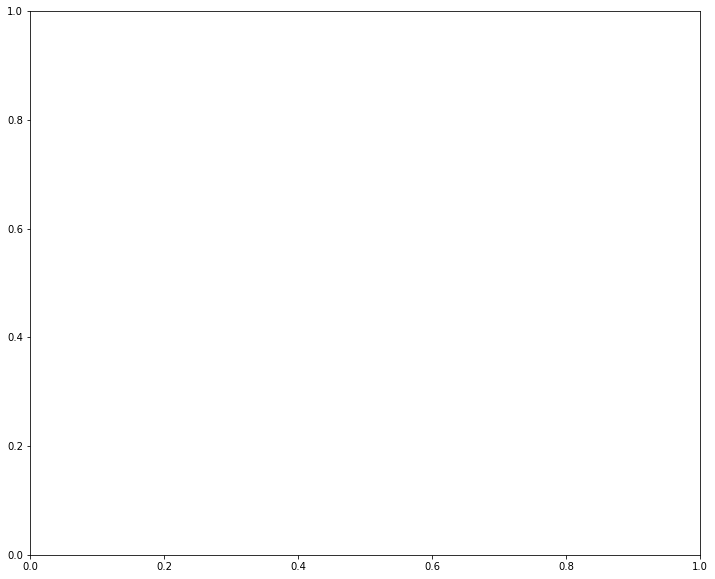

In [76]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

with open('Test_logs2.pkl', 'rb') as pickle_file:
    content = pickle.load(pickle_file)
content = content[['name','button','door_left','door_right','open_drawer','close_drawer','dial_off',\
              'block_cupboard_right','block_cupboard_left','block_left',\
              'block_right','block_shelf','block_drawer',\
            'block_lengthways', 'block_ori_default','block_upright']]
content['dial flip'] = content['dial_off']

content.drop('dial_off', axis= 1, inplace=True)
data = content.set_index('name').T.sort_values('RGCSB0_00003', axis=0, ascending=False)*100
data.drop('GCSB0_0003', axis= 1, inplace=True)
data.drop('GCSB0_00003', axis= 1, inplace=True)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1,1, 1)
df = data

x = df.index
# ax.plot(df['RGCSB0_0003'],x, c=runcolors2['B0_0003'])
# ax.plot(df['RGCSB0_00003'],x, c=runcolors2['B0_00003'])
# ax.plot(df['PROB0_02'],x, c=colors[3])
# ax.plot(df['GCSB0_000003'],x, c=runcolors2['B0_000003'])
# ax.set_yticks(range(len(data.index)));
# ax.set_yticklabels([item for item in data.index.tolist()], rotation=0, size= 22);
# ax.set_xlim(0,100)
# ax.set_ylabel("Success rate (%)", size=22)
# ax.legend(['Determinstic, B=0.0003', 'Determinstic, B=0.00003','Probabilistic, B=0.02', 'Determinstic, B=0.000003'])
# ax.tick_params(axis='both', which='major', labelsize=22)
# ax.tick_params(axis='both', which='minor', labelsize=8)
# params = {'legend.fontsize': 25,
#           'legend.handlelength': 2}
# plt.rcParams.update(params)


import plotly.graph_objects as go
from plotly.graph_objs import *
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

fig = go.Figure(data=[
    go.Bar(name=r'$Deterministic \; \beta 3 \times 10^{-4}$', x=df['RGCSB0_0003'], y=x,orientation='h'),
    go.Bar(name=r'$Deterministic \; \beta 3 \times 10^{-5}$', x=df['RGCSB0_00003'], y=x,orientation='h'),
    go.Bar(name=r'$Deterministic \; \beta 3 \times 10^{-6}$', x=df['GCSB0_000003'], y=x,orientation='h'),
    go.Bar(name=r'$Probabilistic \; \beta 2 \times 10^{-2}$', x=df['PROB0_02'], y=x,orientation='h'),
    
], layout=layout)
# Change the bar mode
fig.update_layout(barmode='group', xaxis_title="Success Rate",
    yaxis_title="Tasks")

fig.update_layout(legend=dict(
    yanchor="top",
    y=1.1,
    xanchor="left",
    x=0.05,
    orientation="h",
    traceorder='normal'
))

fig.show()


In [52]:
d = pd.DataFrame({'names': data.columns.values, 'vals':data.mean(axis=0)})

In [55]:
import plotly.express as px

fig = px.bar(d, x='names', y='vals')
fig.show()

In [19]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=df['RGCSB0_0003'], y=x),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


In [22]:
plt.bar(data.mean(axis=0))

TypeError: bar() missing 1 required positional argument: 'height'

In [63]:
runids = {'B0_00003':'3v50zkj7', 'IMB0_00003':'39bf9sl8'}

rundata = {}
runcolors = {}
runcolors2 = {}

for i, (name, ID) in enumerate(runids.items()):
    run = api.run(f"sholto/learning-from-play_v2/{ID}")
    # save the metrics for the run to a csv file
    metrics_dataframe = run.history()
    metrics_dataframe.to_csv(f"runs/{name}.csv")
    rundata[name] = pd.read_csv(f"runs/{name}.csv")
    runcolors[name] = colors[i]
    runcolors2[name] = colors2[i]

<IPython.core.display.Javascript object>


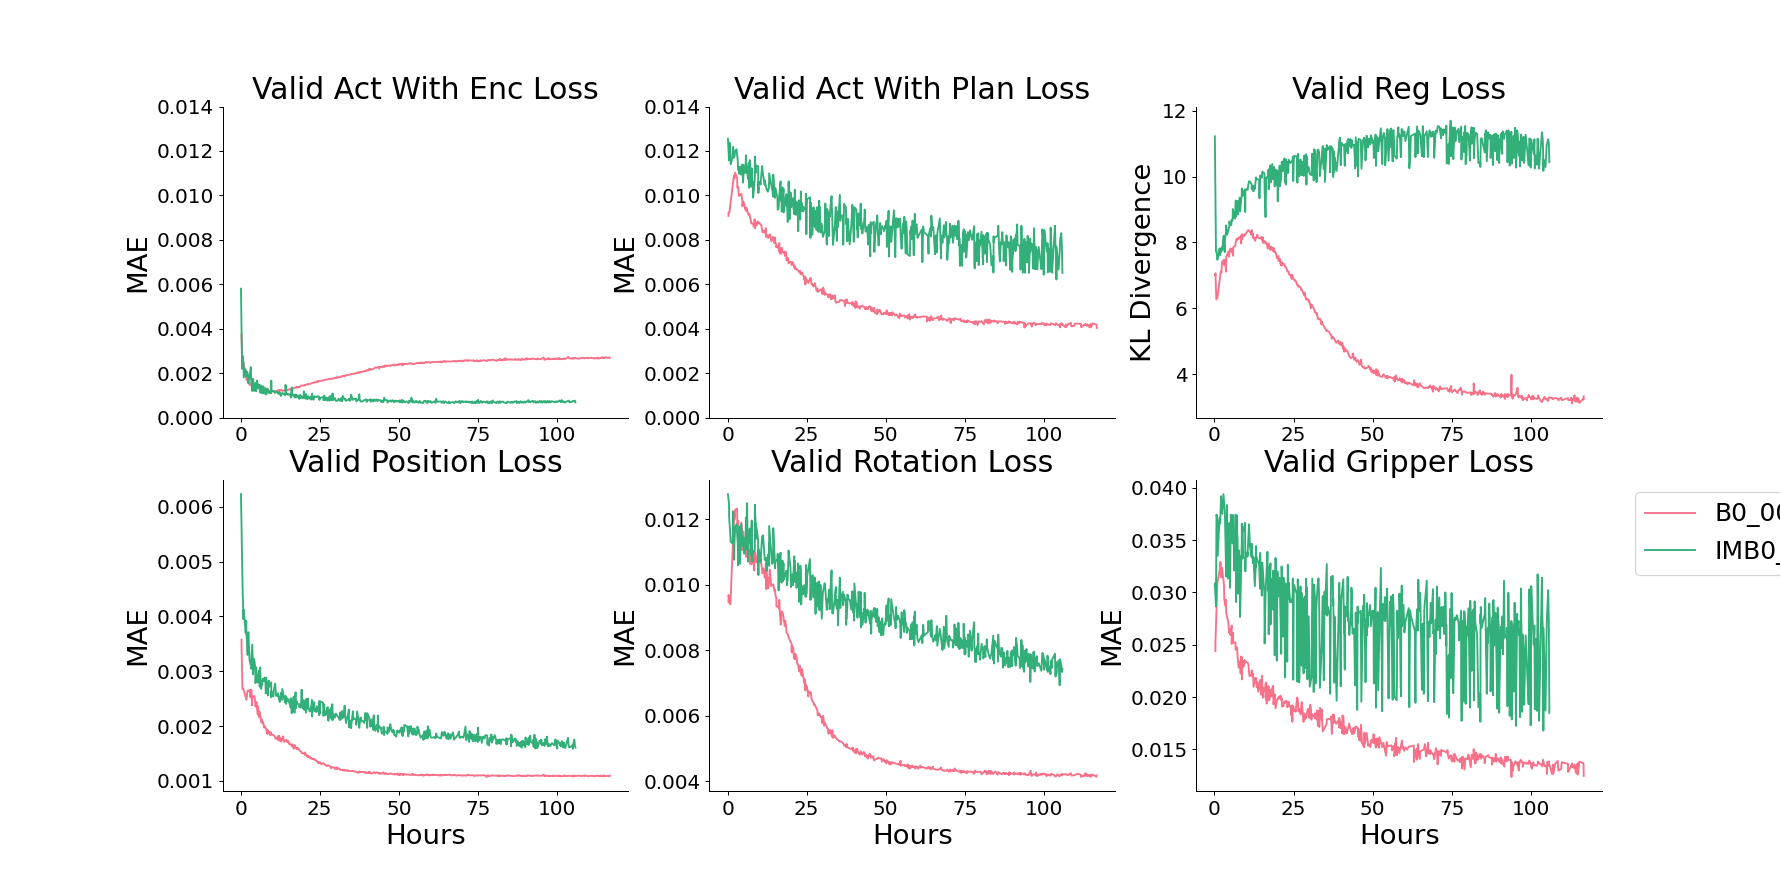

In [27]:
comparison_plot(rundata, {'B0_00003':runcolors['B0_00003'], 'IMB0_00003':colors[2]})

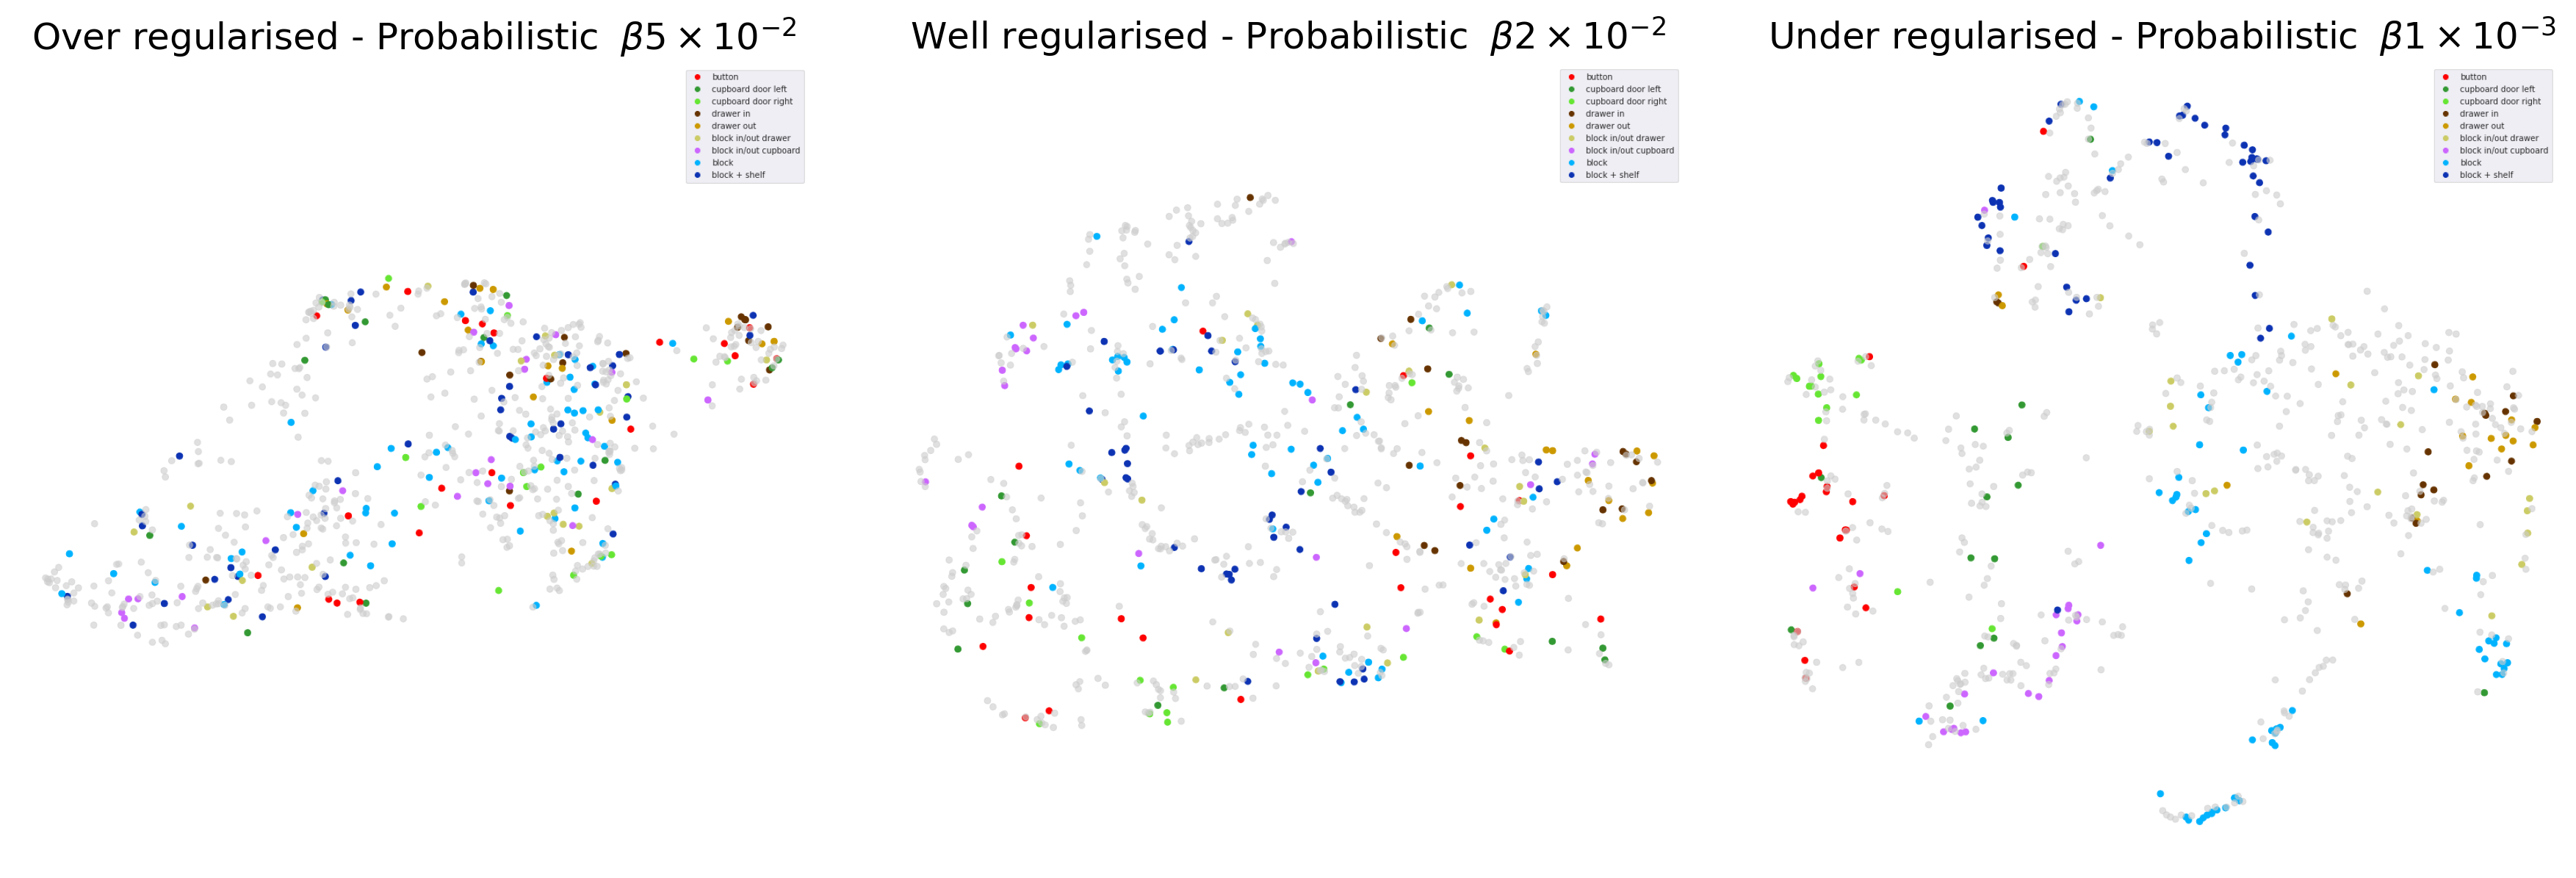

In [86]:
import matplotlib.image as mpimg
img1 = mpimg.imread('bad_latent.png')
img2 = mpimg.imread('nice_latent.png')
img3 = mpimg.imread('B0001.png')

fig = plt.figure(figsize=(18, 12),dpi=200)
#creating a subplot 
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.imshow(img1)
ax1.set_title(r'Over regularised - Probabilistic $ \; \beta 5 \times 10^{-2}$', fontsize=18)
ax2.set_title(r'Well regularised - Probabilistic $ \; \beta 2 \times 10^{-2}$', fontsize=18)
ax3.set_title(r'Under regularised - Probabilistic $ \; \beta 1 \times 10^{-3}$', fontsize=18)
ax2.imshow(img2)
ax3.imshow(img3)
fig.tight_layout() 
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()
